<a href="https://colab.research.google.com/github/anilbhatt-DataAnalyst/Hotel_Booking_Analysis/blob/main/From_Scratch_EDA_Hotel_Booking_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### <b> Mounting the Google Drive

In [121]:
from google.colab import drive     
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# hotel_df_excel = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis - Anil Bhatt/Hotel Bookings.xlsx')

In [123]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis - Anil Bhatt/hotel_bookings.csv')

## <b> Data Understanding

In [124]:
print(f'We have {hotel_df.shape[1]} Variables (Columns) and {hotel_df.shape[0]} Observations (Rows)')

We have 32 Variables (Columns) and 119390 Observations (Rows)


#### We have 32 COLUMNS in the Hotel DataFrame and 1,19,390 ROWS.

#### Columns_Names are mentioned below

In [125]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [126]:
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [127]:
hotel_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [128]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [129]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [130]:
hotel_df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### After removing duplicate ROWS, we got 87,396 Rows.

#### This means original Hotel DataFrame had 31,994 Duplicate Rows.

#### Storing the DataFrame with duplicate values in new variable, "dropped_hotel_df".

In [131]:
dropped_hotel_df = hotel_df.drop_duplicates()

In [132]:
hotel_df = hotel_df.drop_duplicates()

#### Now the DataFrame has dupliated values removed!

In [133]:
hotel_df.shape

(87396, 32)

### MVT (Missing Value Treatment)

In [135]:
(1-hotel_df.count()/87396)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

#### <b> "company" column has approx 94% missing values, while "agent" column has approx 14% missing values.

In [136]:
null_hotel_df = hotel_df.dropna()

In [137]:
print(null_hotel_df[['company', 'agent']])

        company  agent
2392      113.0  240.0
2697      281.0  185.0
2867      281.0  334.0
2877      281.0  328.0
2878      281.0  326.0
...         ...    ...
112499    478.0    9.0
113046    148.0  290.0
113082    148.0  290.0
113627    229.0   14.0
116451    421.0    9.0

[189 rows x 2 columns]


In [138]:
hotel_df.shape

(87396, 32)

In [139]:
# hotel_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'Column_Names', 0: 'Counts'})[0:5]
hotel_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'Column_Names', 0: 'Counts'})[0:4]

,Column_Names,Counts
0,company,82137
1,agent,12193
2,country,452
3,children,4


In [140]:
null_columns = hotel_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'Column_Names', 0: 'Counts'})[0:4]['Column_Names']
null_columns

0     company
1       agent
2     country
3    children
Name: Column_Names, dtype: object

In [141]:
hotel_df[null_columns]

,company,agent,country,children
0,NaN,NaN,PRT,0.0
1,NaN,NaN,PRT,0.0
2,NaN,NaN,GBR,0.0
3,NaN,304.0,GBR,0.0
4,NaN,240.0,GBR,0.0
...,...,...,...,...
119385,NaN,394.0,BEL,0.0
119386,NaN,9.0,FRA,0.0
119387,NaN,9.0,DEU,0.0
119388,NaN,89.0,GBR,0.0


In [142]:
hotel_df_new = hotel_df.drop(columns = ['company'], axis = 1)

In [143]:
hotel_df_new.shape

(87396, 31)

In [144]:
hotel_df_new['country'][hotel_df_new['country'].isnull()].reset_index().head(3)

,index,country
0,30,NaN
1,4127,NaN
2,7092,NaN


In [145]:
hotel_df_new['agent'].fillna(0,inplace=True)
hotel_df_new['children'].fillna(0,inplace=True)

In [146]:
hotel_df_new['country'].fillna('NO_COUNTRY!',inplace=True)

In [147]:
hotel_df_new.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'Column_Names', 0: 'Counts'})[0:4]

,Column_Names,Counts
0,hotel,0
1,is_repeated_guest,0
2,reservation_status,0
3,total_of_special_requests,0


#### Adding New Columns

In [153]:
hotel_df_new['total_guests'] = hotel_df_new['adults'] + hotel_df_new['babies'] + hotel_df_new['children']
hotel_df_new['total_duration_of_stay'] = hotel_df_new['stays_in_weekend_nights'] + hotel_df_new['stays_in_week_nights']

In [154]:
hotel_df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_guests',
       'duration_of_stay', 'total_duration_of_stay'],
      dtype='object')

#### Outlier Treatment

In [155]:
# Numeric Columns
numeric_columns = hotel_df_new[['previous_cancellations','previous_bookings_not_canceled','lead_time','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_duration_of_stay','total_guests','total_of_special_requests']]

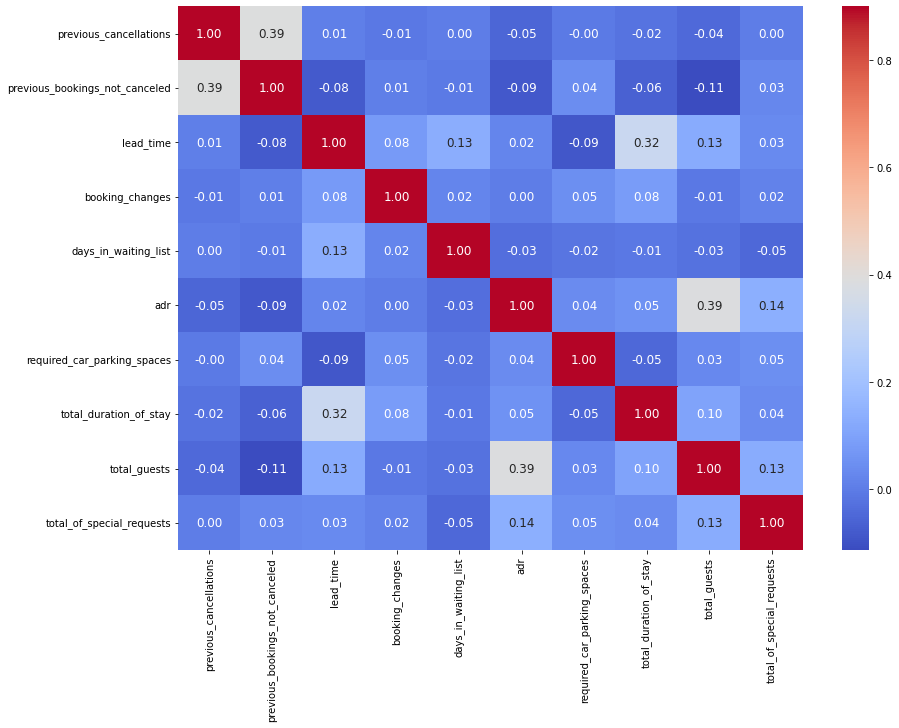

In [156]:
# Finding the relationship between numerical columns, technically called, CORRELATION
co_relation_matrix = numeric_columns.corr()
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(co_relation_matrix, fmt='.2f',cmap='coolwarm',annot = True, annot_kws={'size': 12},  vmax = .9 )

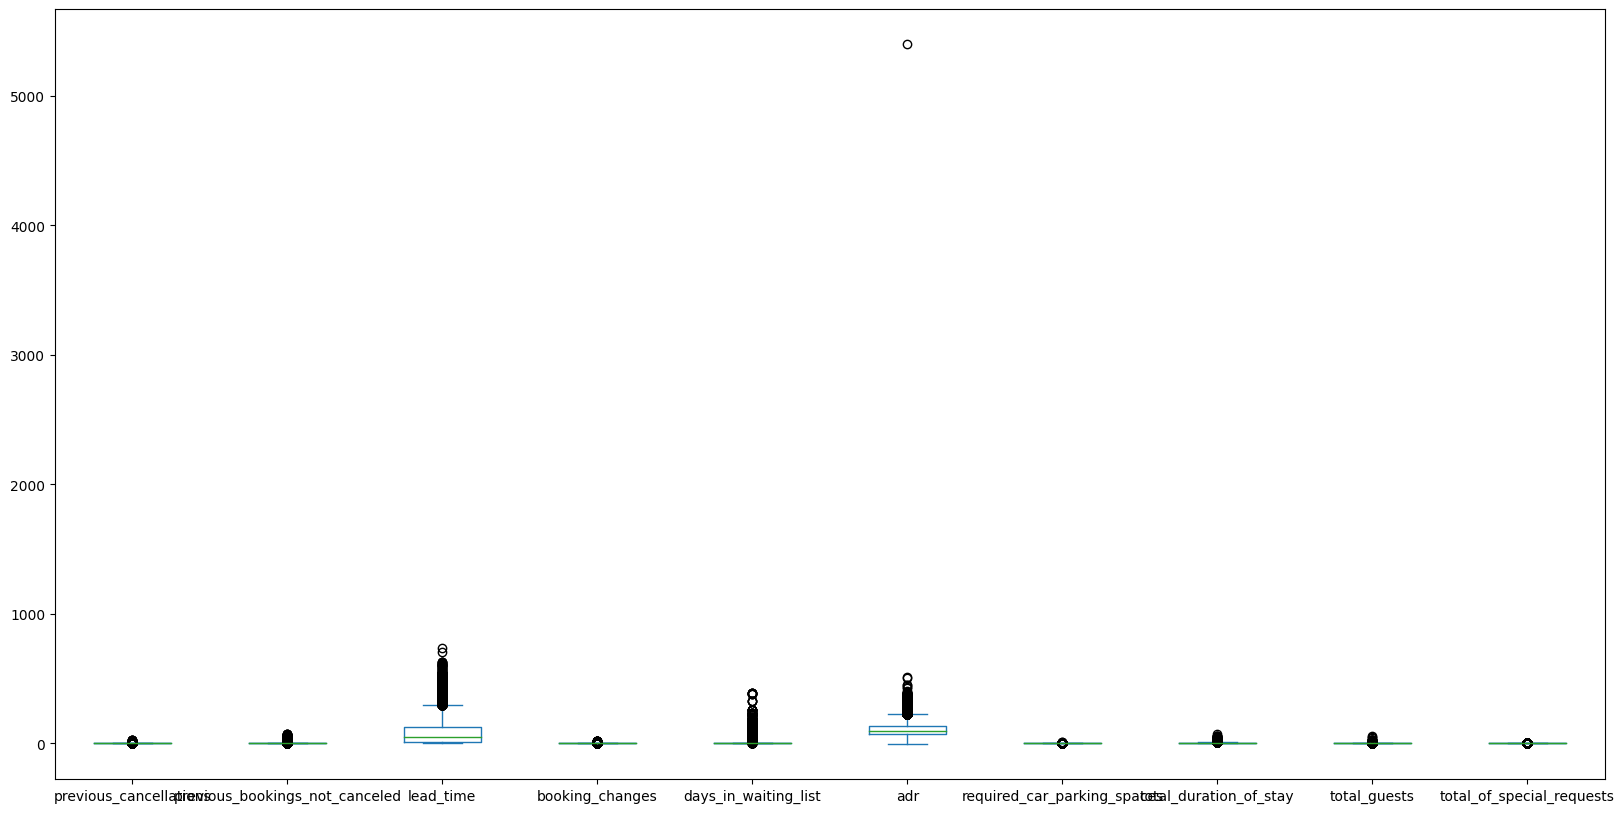

In [157]:
# Outlier Identification
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
numeric_columns.plot(kind = 'box')

In [158]:
# Removing the outlier

hotel_df_new.drop(hotel_df_new[hotel_df_new['adr'] > 5000].index, inplace = True)

In [159]:
hotel_df_new.shape

(87395, 34)

### <b> EDA (Exploratory DATA Analysis)